# Python: numpy, scipy, and matplotlib

This is a tutorial on scientific Python for the [KIPAC computing boot camp](http://kipac.github.io/BootCamp).

Author: [Yao-Yuan Mao](http://yymao.github.io)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

## matplotlib

The easiest way to learn is to look at the [gallery](http://matplotlib.org/gallery.html)

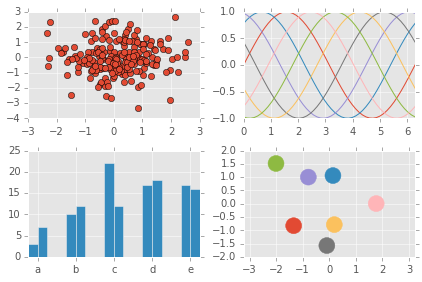

In [81]:
fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.flat

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.color_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x+width, y2, width, color=plt.rcParams['axes.color_cycle'][2])
ax3.set_xticks(x+width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for color in plt.rcParams['axes.color_cycle']:
    ax4.add_patch(plt.Circle(np.random.randn(2), radius=0.3, color=color))
ax4.axis('equal')

plt.tight_layout()
plt.show()

## scipy

See the [documentation page](http://docs.scipy.org/doc/scipy-0.16.0/reference/)

In [84]:
from scipy.integrate import quad

quad(lambda x: x*x*x, 0, 1)

(0.25, 2.7755575615628914e-15)

In [ ]:
from scipy.optimize import minimize, curve_fit

minimize(lambda (x, y): (x-0.4)**2 + (y-0.7)**2, [0, 0])

In [98]:
x = np.random.rand(20)
y = x*5.0 - 3.0 + np.random.randn(20)*0.05
popt, pcov = curve_fit(lambda x, a, b: x*a+b, x, y)

display(popt)

display(pcov)

array([ 4.92591912, -2.95284023])

array([[ 0.00088684, -0.00051245],
       [-0.00051245,  0.00037805]])

In [99]:
from scipy.interpolate import interp1d, griddata

In [ ]:
from scipy.stats import poisson, norm, chi2, kstest, gaussian_kde

## numpy ndarray

You can read more detailed description [here](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).

Main features:
- fixed-size, uniform-type (So it's more like an array in C, and it's fast!)
- operation broadcasting
- various ways to index/slice a ndarray (see [here](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) for details)
- various ways to iterate over a ndarray (see [here](http://docs.scipy.org/doc/numpy/reference/arrays.nditer.html) for details)


In [24]:
a = np.random.rand(5, 3)

In [10]:
display(a)
display(a.shape)
display(a.dtype)

array([[ 0.61157623,  0.99976808,  0.64162995],
       [ 0.75494891,  0.69017613,  0.71770181],
       [ 0.38486476,  0.59425703,  0.0531721 ],
       [ 0.22037675,  0.66454553,  0.75277988],
       [ 0.53781643,  0.38276874,  0.99964564]])

(5, 3)

dtype('float64')

### broadcasting

In [73]:
a = np.arange(40).reshape(5, 8)

In [74]:
a + 1

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40]])

In [75]:
a += 1
display(a)

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40]])

In [78]:
b = np.arange(-1, -9, -1)
display(b)

array([-1, -2, -3, -4, -5, -6, -7, -8])

In [79]:
a + b

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  8,  8,  8,  8,  8,  8,  8],
       [16, 16, 16, 16, 16, 16, 16, 16],
       [24, 24, 24, 24, 24, 24, 24, 24],
       [32, 32, 32, 32, 32, 32, 32, 32]])

In [92]:
c = np.array([10,20,30,40,50], dtype=np.float64)
display(c)

array([ 10.,  20.,  30.,  40.,  50.])

In [93]:
a + c  # this would raise an error

ValueError: operands could not be broadcast together with shapes (5,8) (5,) 

In [94]:
a + c[:,np.newaxis]

array([[ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.],
       [ 29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.],
       [ 47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.],
       [ 65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.],
       [ 83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.]])

### reduce

In [86]:
a.sum()

820

In [87]:
a.mean()

20.5

In [88]:
a.sum(axis=1)

array([ 36, 100, 164, 228, 292])

In [89]:
a.max(axis=0)

array([33, 34, 35, 36, 37, 38, 39, 40])

In [90]:
np.median(a, axis=1)

array([  4.5,  12.5,  20.5,  28.5,  36.5])

In [38]:
np.std(a, axis=0)

array([[ 8.48528137,  8.48528137],
       [ 8.48528137,  8.48528137],
       [ 8.48528137,  8.48528137]])

### tensor product

In [5]:
a = np.arange(15).reshape(5,3)
b = np.arange(12).reshape(3,4)

display(a)
display(b)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
np.dot(a, b)

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218],
       [164, 203, 242, 281]])

In [7]:
a = np.arange(30).reshape(5,3,2)
b = np.arange(60).reshape(3,4,5)

display(a)
display(b)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [8]:
np.einsum('ijk,jli', a, b)

array([[5200, 6250, 7300, 8350],
       [5530, 6655, 7780, 8905]])

### indexing and slicing

(30, 30)

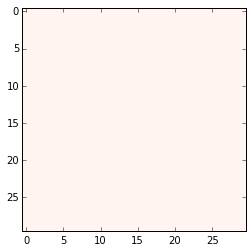

In [28]:
m = np.zeros((30, 30))
display(m.shape)
plt.imshow(m, 'Reds', interpolation='None');

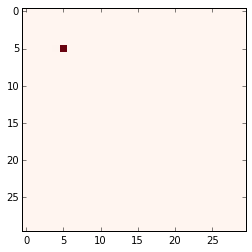

In [29]:
m.fill(0)
m[5,5] = 1
plt.imshow(m, 'Reds', interpolation='None');

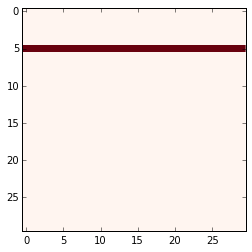

In [30]:
m.fill(0)
m[5] = 1
plt.imshow(m, 'Reds', interpolation='None');

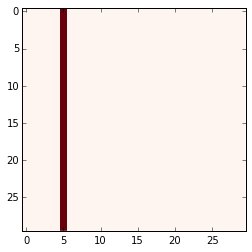

In [31]:
m.fill(0)
m[:,5] = 1
plt.imshow(m, 'Reds', interpolation='None');

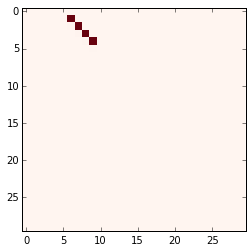

In [35]:
m.fill(0)
m[[1,2,3,4],[6,7,8,9]] = 1
plt.imshow(m, 'Reds', interpolation='None');

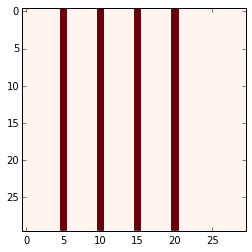

In [37]:
m.fill(0)
m[:,[5,10,15,20]] = 1
plt.imshow(m, 'Reds', interpolation='None');

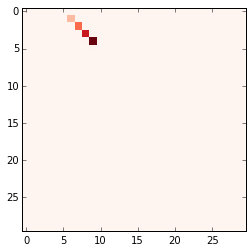

In [39]:
m.fill(0)
m[[1,2,3,4],[6,7,8,9]] = [1,2,3,4]
plt.imshow(m, 'Reds', interpolation='None');

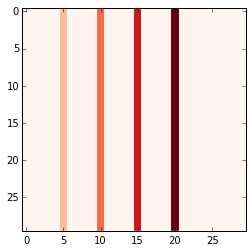

In [53]:
m.fill(0)
m[:,[5,10,15,20]] = [1,2,3,4]
plt.imshow(m, 'Reds', interpolation='None');

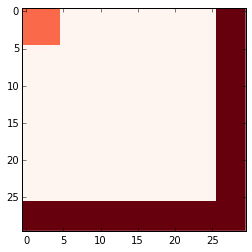

In [62]:
i, j = np.indices(m.shape)

m.fill(0)
m[(i<5) & (j<5)] = 1
m[(i>25) | (j>25)] = 2
plt.imshow(m, 'Reds', interpolation='None');

In [65]:
np.array([0,1,2,3,4])[np.array([True,  True, False, False, False])]

array([0, 1])

### useful functions

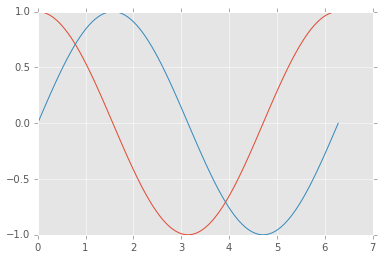

In [104]:
# You can find most mathematical function. 
# For special functions, find them in `scipy.special`

x = np.linspace(0, np.pi*2, 101)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

In [108]:
# dealing with bool array

a = np.random.randint(2, size=20).astype(bool)

display(np.count_nonzero(a))
display(np.where(a))

7

(array([ 1,  3,  5,  7, 16, 17, 19]),)

In [110]:
# argsort

a = np.random.rand(10)

display(a)
display(a.argsort())

display(a[a.argsort()])

# note: to sort "in place", just do a.sort()

array([ 0.07467457,  0.06998503,  0.99140425,  0.59576992,  0.69605383,
        0.61565712,  0.4019944 ,  0.88734325,  0.50915338,  0.16712939])

array([1, 0, 9, 6, 8, 3, 5, 4, 7, 2])

array([ 0.06998503,  0.07467457,  0.16712939,  0.4019944 ,  0.50915338,
        0.59576992,  0.61565712,  0.69605383,  0.88734325,  0.99140425])

In [ ]:
# 

np.histogram()
np.bincount()
np.searchsorted()

### Task 

In [73]:
a = np.zeros((10, 10), dtype=int)

for i, row in enumerate(a):
    if i==0:
        row[:] = 1
    else:
        pass # TODO
    
display(a)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
np.lookfor('cumulative')